In [7]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords\

df = pd.read_csv("E:/Datasets/bbc-text.csv")

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tyger\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Here we are using the Natural Language Toolkit Library that has many corpuses and relevant files that will help us to eliminate the stop words. The stop words are those words in the english language that are unnecessary in the relevance of the overall meaning of the sentence. They are 'a','an','the' etc.

In [9]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


Here Porter Stemmer is an algorithm that reduces the words down to their root form. This helps us to get to our results easier and with relevant ease. Although the words may not be a real english word they give the same result as the root word. eg Running becomes Run.

In [10]:
text = df['text']
category =df['category']

In [11]:
import re

The RE Library is a string manipulation library that is a powerfool tool that is often  used in Natural Language Processing

In [12]:
corpus = []
for i in range(len(text)):
    x = text[i]
    temp = re.sub('[^a-zA-Z0-9]',' ',x)
    temp =temp.lower()
    temp = temp.split()

    temp = [ps.stem(word) for word in temp if not word in stopwords.words('english')]
    temp = ' '.join(temp)
    corpus.append(temp)

Here we initialised an empty list with the name of corpus and we start replacing the upper case letters, splitting the words, and alphabets etc.
We will keep on storing the the edied words in a temporary variable called temp and later append it to the corpus.

In [13]:
text[2024]

'blair blasts tory spending plans tony blair has launched an attack on conservative spending plans  saying they are a  ludicrous improbability .  the prime minister has told a labour party gathering that the tory policies would cause economic failure. tory leader michael howard has said his party would cut £35bn in  wasteful  spending to allow £4bn in tax cuts. on saturday  tory shadow home secretary david davis said the tories would fund the cuts by removing  inefficiencies  which had  burgeoned  under labour. in his speech  mr blair contrasted a reformed labour party  which had learned to occupy the political centre ground  with a hidebound tory party  which he said would turn the clock back with spending cuts. mr blair said:  the conservative tax and spending proposals would put at risk  both britain s hard-won economic stability - the lowest mortgages  inflation  unemployment  for decades - and the key investment in public services.   i believe that the tory plans are as plain a ca

In [14]:
len(text)

2225

In [15]:
length = 0
for i in text:
    length = max(len(i),length)
length
len(corpus)

2225

In [16]:
!pip install gensim

In [17]:
import gensim
from gensim.models import Word2Vec,KeyedVectors
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

In [18]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tyger\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
words = []
for sent in corpus:
    sent_token = sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))
        


In [20]:
model = gensim.models.Word2Vec(words,window =5, min_count=2)
w2v_model = model

In [21]:
sent_tokenize(corpus[0])

['tv futur hand viewer home theatr system plasma high definit tv digit video record move live room way peopl watch tv radic differ five year time accord expert panel gather annual consum electron show la vega discuss new technolog impact one favourit pastim us lead trend programm content deliv viewer via home network cabl satellit telecom compani broadband servic provid front room portabl devic one talk technolog ce digit person video record dvr pvr set top box like us tivo uk sky system allow peopl record store play paus forward wind tv programm want essenti technolog allow much personalis tv also built high definit tv set big busi japan us slower take europ lack high definit program peopl forward wind advert also forget abid network channel schedul put togeth la cart entertain us network cabl satellit compani worri mean term advertis revenu well brand ident viewer loyalti channel although us lead technolog moment also concern rais europ particularli grow uptak servic like sky happen 

In [22]:
y = pd.get_dummies(df['category'],columns= df['category']).values
y

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(corpus,y,test_size = 0.2,random_state=42)


In [24]:
train_words =[]
for sent in x_train:
    sent_token = sent_tokenize(sent)
    for sent in sent_token:
        train_words.append(simple_preprocess(sent))

In [25]:
model = gensim.models.Word2Vec(train_words, window=5, min_count=2)
model.wv.index_to_key

['said',
 'year',
 'mr',
 'would',
 'also',
 'new',
 'peopl',
 'one',
 'us',
 'time',
 'game',
 'say',
 'use',
 'could',
 'last',
 'make',
 'first',
 'two',
 'like',
 'go',
 'govern',
 'play',
 'take',
 'world',
 'get',
 'film',
 'compani',
 'uk',
 'work',
 'back',
 'show',
 'firm',
 'music',
 'best',
 'bn',
 'win',
 'want',
 'market',
 'told',
 'set',
 'month',
 'made',
 'plan',
 'includ',
 'three',
 'report',
 'servic',
 'come',
 'number',
 'ad',
 'way',
 'player',
 'week',
 'countri',
 'parti',
 'need',
 'elect',
 'mani',
 'call',
 'next',
 'labour',
 'bbc',
 'look',
 'expect',
 'well',
 'day',
 'home',
 'nation',
 'may',
 'second',
 'sale',
 'good',
 'help',
 'minist',
 'technolog',
 'think',
 'million',
 'mobil',
 'right',
 'see',
 'top',
 'record',
 'share',
 'start',
 'public',
 'award',
 'england',
 'sinc',
 'end',
 'much',
 'gener',
 'group',
 'part',
 'open',
 'offer',
 'tri',
 'move',
 'claim',
 'still',
 'high',
 'phone',
 'run',
 'blair',
 'system',
 'hope',
 'even',
 'sta

In [26]:
model.corpus_count

1780

In [27]:
model.wv.similar_by_word('criticis')

[('oliv', 0.9968850612640381),
 ('westminst', 0.996545135974884),
 ('verita', 0.9962810277938843),
 ('bnp', 0.9954718351364136),
 ('leadership', 0.9954407811164856),
 ('butler', 0.9945611953735352),
 ('dismiss', 0.9942720532417297),
 ('candid', 0.9939424991607666),
 ('coordin', 0.9936617016792297),
 ('forgotten', 0.9933538436889648)]

In [28]:
from keras.preprocessing.text import Tokenizer
maxlen = 3000
tokenizer = Tokenizer(num_words=50000,filters='~`!@#$%^&*()-=<>?/_+{}:",./',lower =True)
tokenizer.fit_on_texts(x_train)

In [29]:
word_index = tokenizer.word_index

In [30]:
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)


In [31]:
x_train_sequences[21]

[9,
 964,
 161,
 2291,
 548,
 9,
 1409,
 548,
 964,
 455,
 591,
 349,
 2012,
 72,
 3321,
 568,
 105,
 672,
 952,
 235,
 3099,
 1409,
 548,
 1142,
 4931,
 4333,
 1250,
 142,
 4334,
 1010,
 718,
 45,
 67,
 3321,
 61,
 5736,
 65,
 7060,
 470,
 744,
 229,
 9500,
 4335,
 4335,
 3732,
 1182,
 15,
 2,
 5304,
 1,
 4,
 518,
 425,
 25,
 4931,
 893,
 4931,
 247,
 455,
 694,
 1587,
 2663,
 168,
 672,
 113,
 4335,
 30,
 3566,
 19,
 507,
 296,
 5304,
 16,
 1466,
 286,
 698,
 7,
 102,
 1569,
 548,
 195,
 1,
 5304,
 7061,
 494,
 72,
 4335,
 436,
 640,
 101,
 656,
 32,
 600,
 322,
 559,
 3317,
 38,
 1249,
 12297,
 38,
 1568,
 2,
 323,
 5304,
 85,
 3912,
 123,
 139,
 27,
 40,
 2190,
 79,
 376,
 930,
 134,
 4335,
 1082,
 5305,
 3447,
 1507,
 7062,
 259,
 1567,
 61,
 893,
 31,
 672,
 952,
 235,
 3099,
 567,
 1587,
 23,
 548,
 517,
 539,
 41,
 5736,
 65,
 7060,
 122,
 548,
 27,
 44,
 5304,
 7063,
 656,
 169,
 2592,
 6315,
 182,
 3321,
 7063,
 104,
 425,
 9500,
 12298,
 148,
 594,
 661,
 288,
 71,
 5,
 1939

In [32]:
len(x_train_sequences[0]),len(x_train_sequences[1])

(142, 233)

In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train_sequences, maxlen=3000, padding ='pre')
x_test = pad_sequences(x_test_sequences, maxlen=3000, padding ='pre')

In [34]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,SpatialDropout1D
from keras.callbacks import EarlyStopping 

In [35]:
model = Sequential()
model.add(Embedding(50000,100,input_length=3000))
model.add(LSTM(100, dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [36]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3000, 100)         5000000   
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 5080905 (19.38 MB)
Trainable params: 5080905 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [37]:
history = model.fit(x_train,y_train,epochs=8,batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/8
26/26 [==============================] - 1503s 58s/step - loss: 1.5796 - accuracy: 0.3009 - val_loss: 1.4297 - val_accuracy: 0.2978
Epoch 2/8
26/26 [==============================] - 1690s 65s/step - loss: 1.0383 - accuracy: 0.5787 - val_loss: 0.8766 - val_accuracy: 0.6742
Epoch 3/8
26/26 [==============================] - 1730s 66s/step - loss: 0.7970 - accuracy: 0.6717 - val_loss: 0.9105 - val_accuracy: 0.6685
Epoch 4/8
26/26 [==============================] - 1658s 64s/step - loss: 0.8339 - accuracy: 0.6848 - val_loss: 1.5679 - val_accuracy: 0.4101
Epoch 5/8
26/26 [==============================] - 1623s 62s/step - loss: 1.0748 - accuracy: 0.7047 - val_loss: 0.6876 - val_accuracy: 0.8090
Epoch 6/8
26/26 [==============================] - 1691s 65s/step - loss: 0.6586 - accuracy: 0.8377 - val_loss: 0.5747 - val_accuracy: 0.7528
Epoch 7/8
26/26 [==============================] - 1683s 65s/step - loss: 0.4561 - accuracy: 0.8876 - val_loss: 0.5141 - val_accuracy: 0.8258
Epoch 

In [38]:
accuracy = model.evaluate(x_test,y_test)
print(accuracy[0],accuracy[1])


14/14 [==============================] - 21s 1s/step - loss: 0.6399 - accuracy: 0.8112
0.6398810744285583 0.8112359642982483


In [39]:
import matplotlib.pyplot as plt

AttributeError: Line2D.set() got an unexpected keyword argument 'loss'

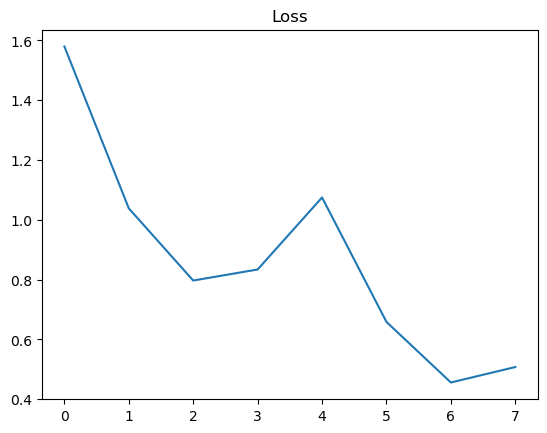

In [43]:
plt.title('Loss')
plt.plot(history.history['loss'],label ='train')
plt.plot(history.history['val_loss'], loss ='test')
plt.legend()
plt.show();

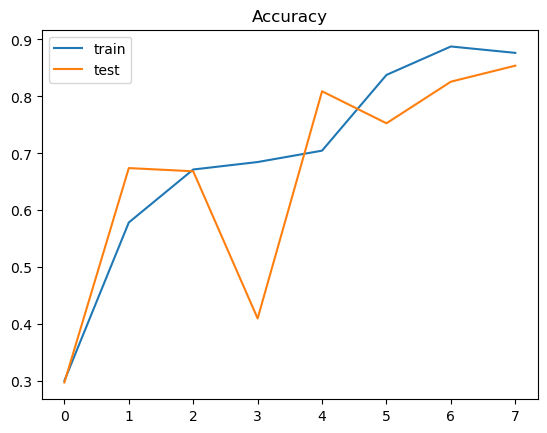

In [42]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'],label ='train')
plt.plot(history.history['val_accuracy'],label ='test')
plt.legend()
plt.show();
